In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading training data from a csv file

In [2]:
train_data = pd.read_csv('train_loan.csv')

# Checking dataset infomation 

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
cat_colums = ['Gender','Married','Dependents','Self_Employed']

In [8]:
num_colums = ['LoanAmount','Loan_Amount_Term', 'Credit_History']

In [9]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Checking for missing values

In [10]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Plots a graph to find out the skewness

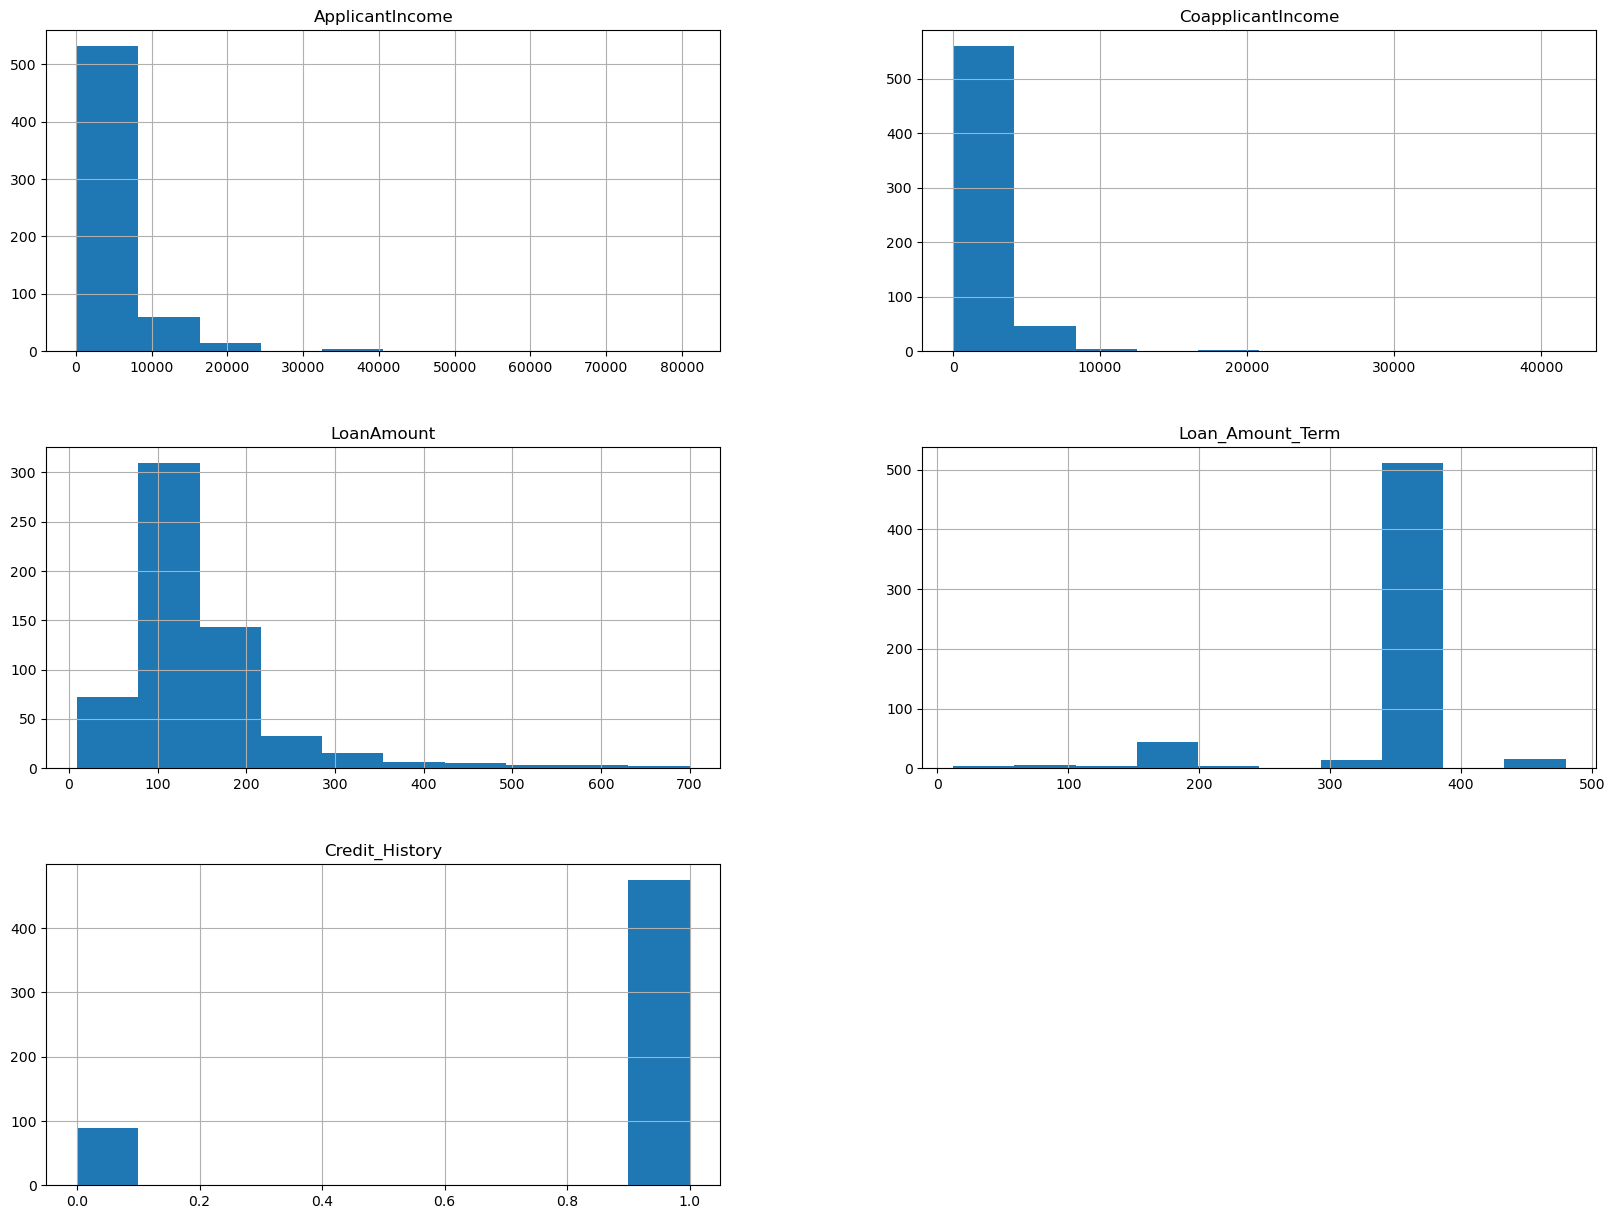

In [11]:
plot_num_columns = train_data.select_dtypes(include = ['float', 'int'])
plot_num_columns.hist(figsize=(20, 15))
plt.show()

# Filling missing values

In [12]:
for col in num_colums:
    train_data[col] = train_data[col].fillna(train_data[col].median())

# Verifying the dataset after performing missing value step

In [13]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Finding outliers using box plot

Text(0.5, 1.0, 'ApplicantIncome Box Plot')

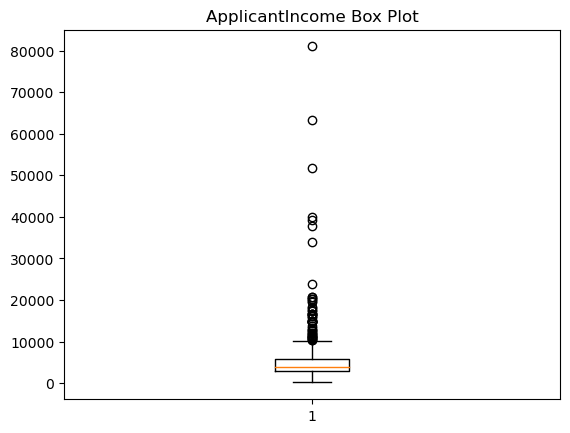

In [14]:
plt.boxplot(train_data['ApplicantIncome'])
plt.title('ApplicantIncome Box Plot')

In [15]:
Q1 = np.percentile(train_data['ApplicantIncome'], 25, method = 'midpoint')
Q2 = np.percentile(train_data['ApplicantIncome'], 50, method = 'midpoint')
Q3 = np.percentile(train_data['ApplicantIncome'], 75, method = 'midpoint')

In [16]:
print('Q1 : ', Q1)
print('Q2 : ', Q2)
print('Q3 : ', Q3)

Q1 :  2879.0
Q2 :  3812.5
Q3 :  5790.0


In [17]:
IQR = Q3 - Q1

In [18]:
low_limit = Q1 - 1.5 * IQR

In [19]:
up_limit = Q3 + 1.5 * IQR

In [20]:
print('Lower Limit : ', low_limit)

Lower Limit :  -1487.5


In [21]:
print('Upper Limit :', up_limit)

Upper Limit : 10156.5


In [22]:
outlier = []
for x in train_data['ApplicantIncome']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [23]:
outlier

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

# Finding the index of outlier data

In [24]:
ind1 = train_data['ApplicantIncome'] > up_limit

In [25]:
train_data.loc[ind1].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

# Droping outlier data

In [26]:
train_data.drop(train_data.loc[ind1].index, inplace = True)

Text(0.5, 1.0, 'ApplicantIncome Box Plot')

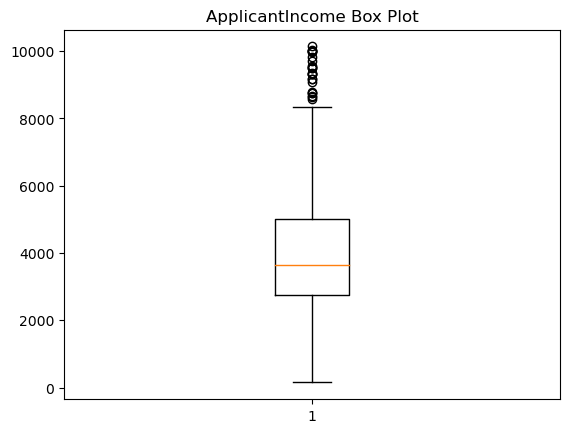

In [27]:
plt.boxplot(train_data['ApplicantIncome'])
plt.title('ApplicantIncome Box Plot')

Text(0.5, 1.0, 'CoapplicantIncome Box Plot')

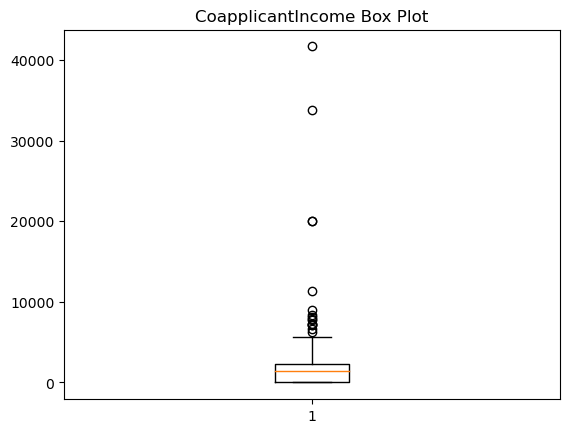

In [28]:
plt.boxplot(train_data['CoapplicantIncome'])
plt.title('CoapplicantIncome Box Plot')

In [29]:
Q1 = np.percentile(train_data['CoapplicantIncome'], 25, method = 'midpoint')
Q2 = np.percentile(train_data['CoapplicantIncome'], 50, method = 'midpoint')
Q3 = np.percentile(train_data['CoapplicantIncome'], 75, method = 'midpoint')
    

In [30]:
print('Q1 : ', Q1)
print('Q2 : ', Q2)
print('Q3 : ', Q3)

Q1 :  0.0
Q2 :  1405.5
Q3 :  2338.0


In [31]:
IQR = Q3 - Q1

In [32]:
low_limit = Q1 - 1.5 * IQR

In [33]:
up_limit = Q3 + 1.5 * IQR

In [34]:
print('Lower Limit : ', low_limit)

Lower Limit :  -3507.0


In [35]:
print('Upper Limit :', up_limit)

Upper Limit : 5845.0


In [36]:
outlier = []
for x in train_data['CoapplicantIncome']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [37]:
outlier

[8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

In [38]:
ind1 = train_data['CoapplicantIncome'] > up_limit

In [39]:
train_data.loc[ind1].index

Int64Index([12, 38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 513, 523,
            581, 600],
           dtype='int64')

In [40]:
train_data.drop(train_data.loc[ind1].index, inplace = True)

Text(0.5, 1.0, 'CoapplicantIncome Box Plot')

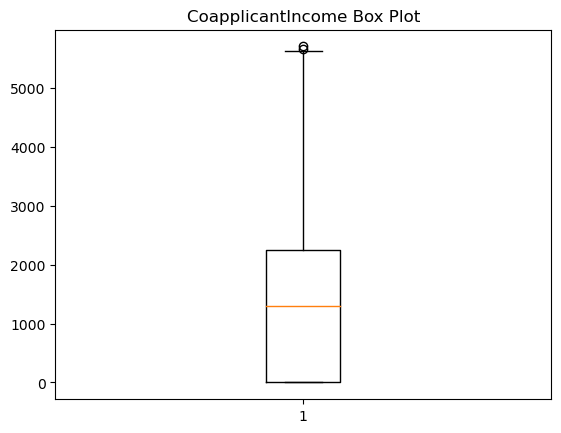

In [41]:
plt.boxplot(train_data['CoapplicantIncome'])
plt.title('CoapplicantIncome Box Plot')

Text(0.5, 1.0, 'LoanAmount Box Plot')

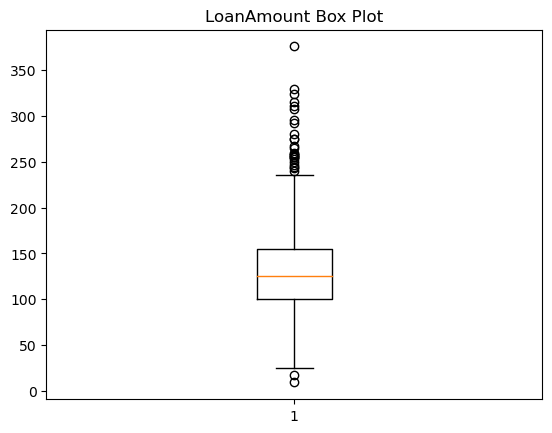

In [42]:
plt.boxplot(train_data['LoanAmount'])
plt.title('LoanAmount Box Plot')

Text(0.5, 1.0, 'Loan_Amount_Term Box Plot')

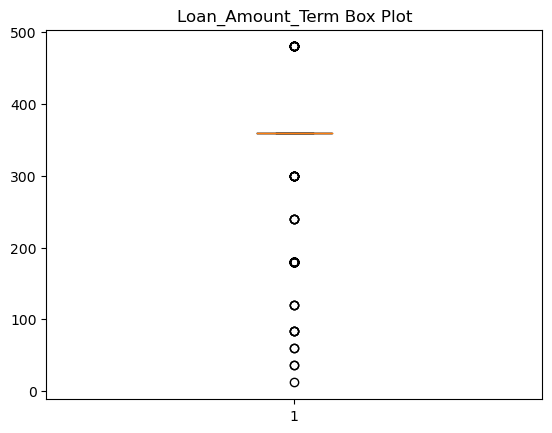

In [43]:
plt.boxplot(train_data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term Box Plot')

In [44]:
Q1 = np.percentile(train_data['Loan_Amount_Term'], 25, method = 'midpoint')
Q2 = np.percentile(train_data['Loan_Amount_Term'], 50, method = 'midpoint')
Q3 = np.percentile(train_data['Loan_Amount_Term'], 75, method = 'midpoint')

In [45]:
print('Q1 : ', Q1)
print('Q2 : ', Q2)
print('Q3 : ', Q3)

Q1 :  360.0
Q2 :  360.0
Q3 :  360.0


In [46]:
IQR = Q3 - Q1

In [47]:
low_limit = Q1 - 1.5 * IQR

In [48]:
up_limit = Q3 + 1.5 * IQR

In [49]:
print('Lower Limit : ', low_limit)

Lower Limit :  360.0


In [50]:
print('Upper Limit :', up_limit)

Upper Limit : 360.0


In [51]:
outlier = []
for x in train_data['Loan_Amount_Term']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [52]:
outlier

[120.0,
 240.0,
 180.0,
 180.0,
 60.0,
 300.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 480.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 480.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 180.0,
 240.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0]

In [53]:
ind1 = train_data['Loan_Amount_Term'] > up_limit

In [54]:
train_data.loc[ind1].index

Int64Index([75, 109, 168, 179, 228, 248, 293, 298, 358, 366, 378, 500, 516,
            573],
           dtype='int64')

In [55]:
train_data.drop(train_data.loc[ind1].index, inplace = True)

Text(0.5, 1.0, 'Loan_Amount_Term Box Plot')

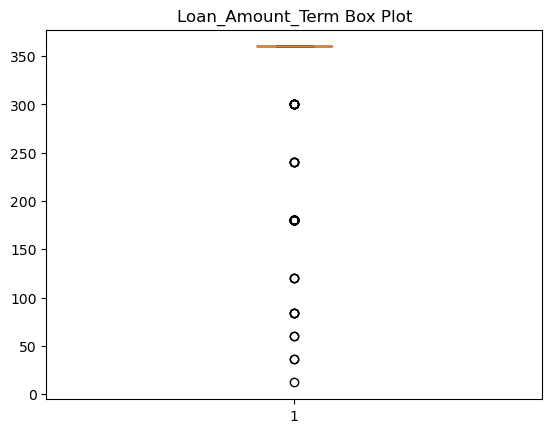

In [56]:
plt.boxplot(train_data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term Box Plot')

Text(0.5, 1.0, 'Credit_History Box Plot')

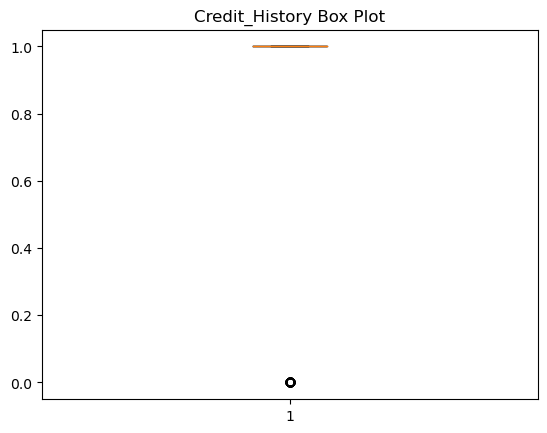

In [57]:
plt.boxplot(train_data['Credit_History'])
plt.title('Credit_History Box Plot')

In [58]:
train_data.shape

(534, 13)

# Encoding categorical column

In [59]:

train_data['Loan_Status'] = train_data.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)


In [60]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [61]:

train_data = train_data.replace({"Gender":{"Male":1, "Female":0 }})

In [62]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [63]:

train_data =train_data.replace({"Married" :{"Yes":1, "No":0}})

In [64]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [65]:

train_data['Education'].value_counts()
train_data= train_data.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

In [66]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [67]:

train_data['Self_Employed'].value_counts()
train_data= train_data.replace({"Self_Employed":{"Yes":1, "No":0 }})

In [68]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [69]:

train_data['Property_Area'] = train_data['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

In [70]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [71]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,1
613,LP002990,0.0,0.0,0,1,1.0,4583,0.0,133.0,360.0,0.0,2,0


In [72]:

train_data['Dependents'] = train_data['Dependents'].replace('3+', '3')
train_data['Dependents']=pd.to_numeric(train_data['Dependents'], errors='coerce')

In [73]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1
613,LP002990,0.0,0.0,0.0,1,1.0,4583,0.0,133.0,360.0,0.0,2,0


In [74]:

train_data = train_data.drop(columns=['Loan_ID'])

In [75]:
train_data.shape

(534, 12)

# Scaling the dataset

In [76]:
from sklearn import preprocessing

In [77]:
train_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,524.000000,532.000000,522.000000,534.000000,505.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.814885,0.654135,0.741379,0.762172,0.126733,4151.426966,1366.610337,130.876404,339.438202,0.859551,1.074906,0.702247
std,0.388762,0.476097,1.002957,0.426152,0.333003,1912.081852,1465.295189,51.915248,61.604431,0.347779,0.822986,0.457699
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2790.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3667.000000,1293.500000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5031.500000,2252.250000,155.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10139.000000,5701.000000,376.000000,360.000000,1.000000,2.000000,1.000000


In [78]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [79]:
train_data = min_max.fit_transform(train_data)

In [80]:
train_data = pd.DataFrame(train_data)
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,524.000000,532.000000,522.000000,534.000000,505.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.814885,0.654135,0.247126,0.762172,0.126733,0.400583,0.239714,0.332088,0.940914,0.859551,0.537453,0.702247
std,0.388762,0.476097,0.334319,0.426152,0.333003,0.191419,0.257024,0.141458,0.177024,0.347779,0.411493,0.457699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.264291,0.000000,0.247956,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.352087,0.226890,0.318801,1.000000,1.000000,0.500000,1.000000
75%,1.000000,1.000000,0.333333,1.000000,0.000000,0.488688,0.395062,0.397820,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
test_data = pd.read_csv('test_loan.csv')

In [82]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [83]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [85]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [86]:

test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].median())

In [87]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64